Exercise 1: K-Nearest Neighbor

Let us implement the algorithm with the help of the 'Mobile.csv' dataset.

It contains data about customers “Age”, “EstimatedSalary”, “Purchased” .

Download the dataset from the shared folder.


Predict if the customer will purchase a mobile or not.

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;


1. load data : mobile.csv

In [3]:
df = pd.read_csv("Datasets/mobile.csv")

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df['Purchased'].unique()

array([0, 1])

In [10]:
purchased_data = df[["Age" , "EstimatedSalary", "Purchased"]] [df["Purchased"] == 1]
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [11]:
not_purchased_data = df[["Age" , "EstimatedSalary", "Purchased"]] [df["Purchased"] == 0]
not_purchased_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
377,42,53000,0
380,42,64000,0
387,39,71000,0
394,39,59000,0


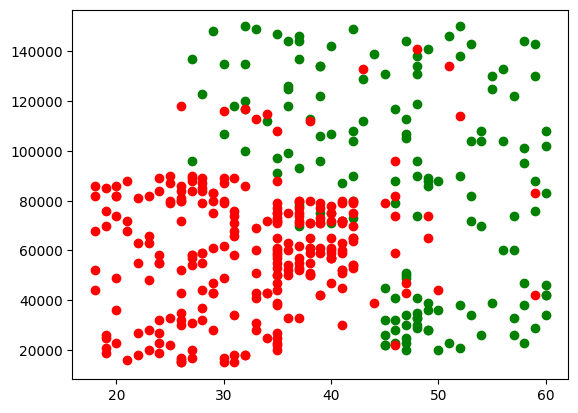

In [12]:
plt.scatter(purchased_data["Age"], purchased_data["EstimatedSalary"], color="green")
plt.scatter(not_purchased_data["Age"], not_purchased_data["EstimatedSalary"], color="red")

In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
df["EstimatedSalary"].max()

np.int64(150000)

In [15]:
df["EstimatedSalary"].min()

np.int64(15000)

In [16]:
df["Age"].max()

np.int64(60)

In [17]:
df["Age"].min()

np.int64(18)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_of_scale = ["Age", "EstimatedSalary"]
scaled_values = scaler.fit_transform(df[features_of_scale])

In [19]:
df["norm_age"] = scaled_values[:,0]
df["norm_salary"] = scaled_values[:,1]

In [20]:
df

,Age,EstimatedSalary,Purchased,norm_age,norm_salary
0,19,19000,0,0.023810,0.029630
1,35,20000,0,0.404762,0.037037
2,26,43000,0,0.190476,0.207407
3,27,57000,0,0.214286,0.311111
4,19,76000,0,0.023810,0.451852
...,...,...,...,...,...
395,46,41000,1,0.666667,0.192593
396,51,23000,1,0.785714,0.059259
397,50,20000,1,0.761905,0.037037
398,36,33000,0,0.428571,0.133333


In [21]:
df["norm_age"].min()

np.float64(0.0)

In [22]:
df["norm_age"].max()

np.float64(0.9999999999999998)

In [23]:
df["norm_salary"].min()

np.float64(0.0)

In [24]:
df["norm_salary"].max()

np.float64(1.0)

In [25]:
X = df[['norm_age', 'norm_salary']]
y = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)


Shape of X_train (320, 2)
Shape of X_test (80, 2)
Shape of y_train (320,)
Shape of y_test (80,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
model.fit(X_train, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [28]:
model.score(X_train, y_train) * 100

91.875

In [30]:
model.score(X_test, y_test) * 100

95.0

SVM 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
iris_data = pd.read_csv("Datasets/iris.csv")

In [33]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris_data.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [37]:
iris_data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [38]:
iris_data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
v_nv_fn = lambda x: 0 if x=="versicolor" else 1

# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)

#iris_data[iris_data["v_nv"] == 0]
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


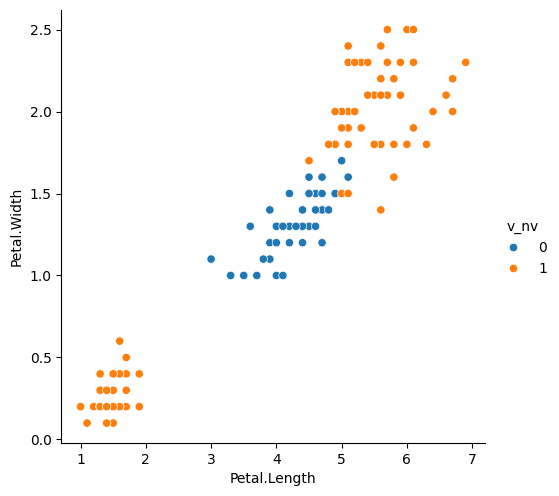

In [41]:
import seaborn as sns
sns.pairplot(iris_data, x_vars="Petal.Length", y_vars="Petal.Width", hue="v_nv", height=5)

In [42]:
from sklearn.svm import SVC
X = iris_data[["Petal.Length", "Petal.Width"]]
y = iris_data["v_nv"]
model = SVC()
model.fit(X,y)
model.score(X,y) * 100

95.33333333333334